In [1]:
#DIR3122: Computational Fluid Dynamics - Bridget McGibbon
#Step 8: Convection-Diffusion in 2D (Burgers' Equation)

#attempted without referring to the lesson
#(referred to lesson to match # of timesteps, value of nu, etc.)

In [2]:
#import libraries
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import sympy as sp
sp.init_printing(use_latex=True)

In [3]:
#define variables
sigma = 0.0009
nu = 0.01

nx = 41
dx = 2/(nx-1)

ny = 41
dy = 2/(ny-1)

nt = 300
dt = sigma*dx*dy/nu

#create arrays for space dimensions
xdim = np.linspace(0,2,nx)
ydim = np.linspace(0,2,ny)

#create 2D arrays for u (x-component of dependant variable) and v (y-component of dependant variable)
u = np.ones((nx, ny))
v = np.ones((nx, ny))

un = np.ones((ny, nx)) 
vn = np.ones((ny, nx))


#set initial conditions
##changing the initial conditions to be non-symmetrical
u[int(0.5/dx):int(1/dx)+1, int(0/dy):int(0.5/dy)+1] = 2
v[int(0.5/dx):int(1/dx)+1, int(0/dy):int(0.5/dy)+1] = 2

In [4]:
# ###variable declarations
# nx = 41
# ny = 41
# nt = 120
# c = 1
# dx = 2 / (nx - 1)
# dy = 2 / (ny - 1)
# sigma = .0009
# nu = 0.01
# dt = sigma * dx * dy / nu


# x = np.linspace(0, 2, nx)
# y = np.linspace(0, 2, ny)

# u = np.ones((ny, nx))  # create a 1xn vector of 1's
# v = np.ones((ny, nx))
# un = np.ones((ny, nx)) 
# vn = np.ones((ny, nx))
# comb = np.ones((ny, nx))

# ###Assign initial conditions

# ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
# u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
# ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
# v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2

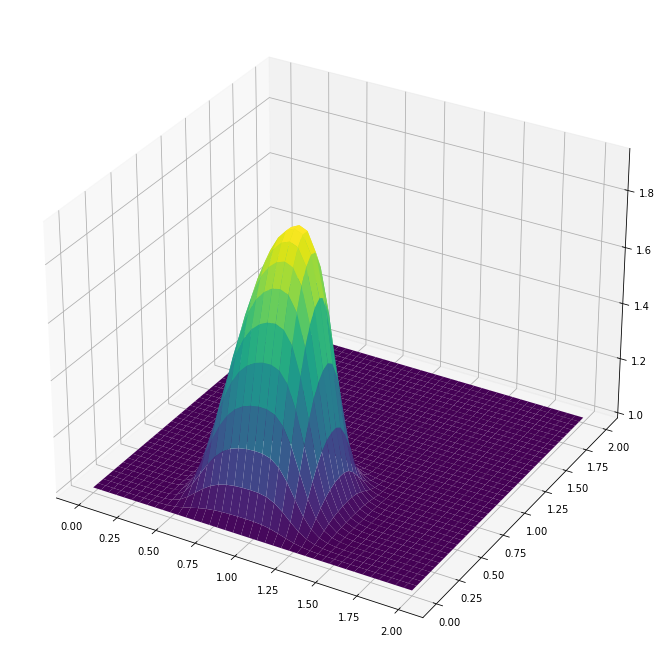

In [13]:
fig = pyplot.figure(figsize = (15,12))
ax = fig.gca(projection='3d')
Y, X = np.meshgrid(ydim, xdim,)
surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

In [9]:
for n in range(nt):
    un = u.copy()
    vn = v.copy()
    
    u[1:-1,1:-1] = un[1:-1,1:-1] - un[1:-1,1:-1]*dt/dx*(un[1:-1,1:-1]-un[0:-2,1:-1]) - vn[1:-1,1:-1]*dt/dy*(un[1:-1,1:-1]-un[1:-1,0:-2]) + nu*dt*(((un[2:,1:-1] +un[0:-2,1:-1] -2*un[1:-1,1:-1])/(dx**2)) + ((un[1:-1,2:] +un[1:-1,0:-2] -2*un[1:-1,1:-1])/(dy**2)))
    v[1:-1,1:-1] = vn[1:-1,1:-1] - un[1:-1,1:-1]*dt/dx*(vn[1:-1,1:-1]-vn[0:-2,1:-1]) - vn[1:-1,1:-1]*dt/dy*(vn[1:-1,1:-1]-vn[1:-1,0:-2]) + nu*dt*(((vn[2:,1:-1] +vn[0:-2,1:-1] -2*vn[1:-1,1:-1])/(dx**2)) + ((vn[1:-1,2:] +vn[1:-1,0:-2] -2*vn[1:-1,1:-1])/(dy**2)))

    
    #boundary conditions: u,v = 1 at boundaries
    u[0,:] = 1
    u[-1,:] = 1
    u[:,0] = 1
    u[:,-1] = 1
    
    v[0,:] = 1
    v[-1, :] = 1
    v[:,0] = 1
    v[:,-1] = 1

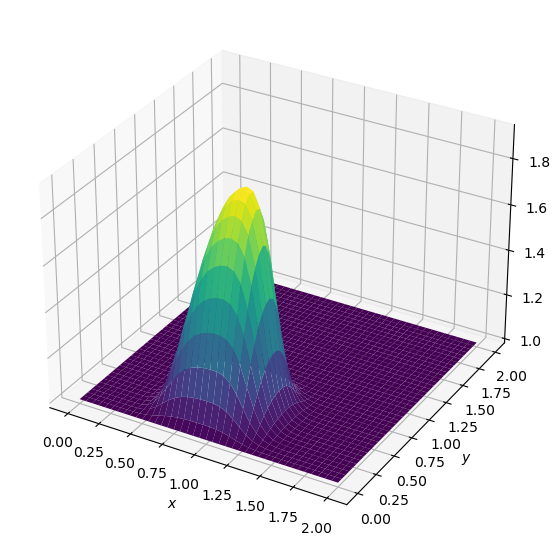

In [11]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
Y, X = np.meshgrid(ydim, xdim)
ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=1, cstride=1)
#ax.plot_surface(X, Y, v, cmap=cm.viridis, rstride=1, cstride=1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');